In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# BMTK functions sucks and was not clear so made my own fuck them and there shitty code base
def positions_cylinder(N=1, center=[0.0, 0.0, 0.0], height=200.0, width=200.0, plot=False):
    """Generate random points within a cylindrical volume.

    Args:
        N (int): Number of points to generate.
        center (list): Center of the cylinder [x, y, z].
        height (float): Height (along y-axis) of the cylinder.
        width (float): Diameter (width) of the cylinder along x-z plane.
        plot (bool): Whether to plot the generated points.

    Returns:
        np.array: Array of shape (N, 3) containing the coordinates of the points.
    """
    # Random angles in radians
    phi = 2.0 * math.pi * np.random.random([N])
    
    # Random radii within the cylinder's radius
    r = width / 2.0 * np.sqrt(np.random.random([N]))
    
    # Calculating x and z coordinates based on cylindrical coordinates
    x = center[0] + r * np.cos(phi)
    z = center[2] + r * np.sin(phi)
    
    # Random y-coordinates within the height of the cylinder
    y = center[1] + height * (np.random.random([N]))

    if plot:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, c='b', marker='o')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Random Points in Cylinder')
        plt.show()

    return np.column_stack((x, y, z))


In [2]:
from bmtk.builder import NetworkBuilder
net = NetworkBuilder('network')
net.add_nodes(N=2512, pop_name='PN',model_type = 'biophysical',positions=positions_cylinder(N=2512,height=200,width=200))
net.add_nodes(N=1, pop_name='middlecell',model_type = 'biophysical',positions = np.column_stack((0, 100, 0)))


In [3]:
from bmtool.connectors import GaussianDropoff, UnidirectionConnector
gauss_rule_sigma = dict(EE=127.00, II=126.77, EI=99.84, IE=96.60)
def GaussianRule(pmax, conn_type='EE'):
    params = dict(stdev=gauss_rule_sigma[conn_type], pmax=pmax,
                  min_dist=0., max_dist=300)
    return GaussianDropoff(**params)

connector = UnidirectionConnector(p=GaussianRule(.09, conn_type='EE'))
connector.setup_nodes(source=net.nodes(pop_name = 'PN'), target=net.nodes(pop_name = 'middlecell'))
net.add_edges(**connector.edge_params())

In [4]:
net.save('network')


Start building connection 
  from network: pop_name=='PN'
  to network: pop_name=='middlecell'


TypeError: '>=' not supported between instances of 'NoneType' and 'float'

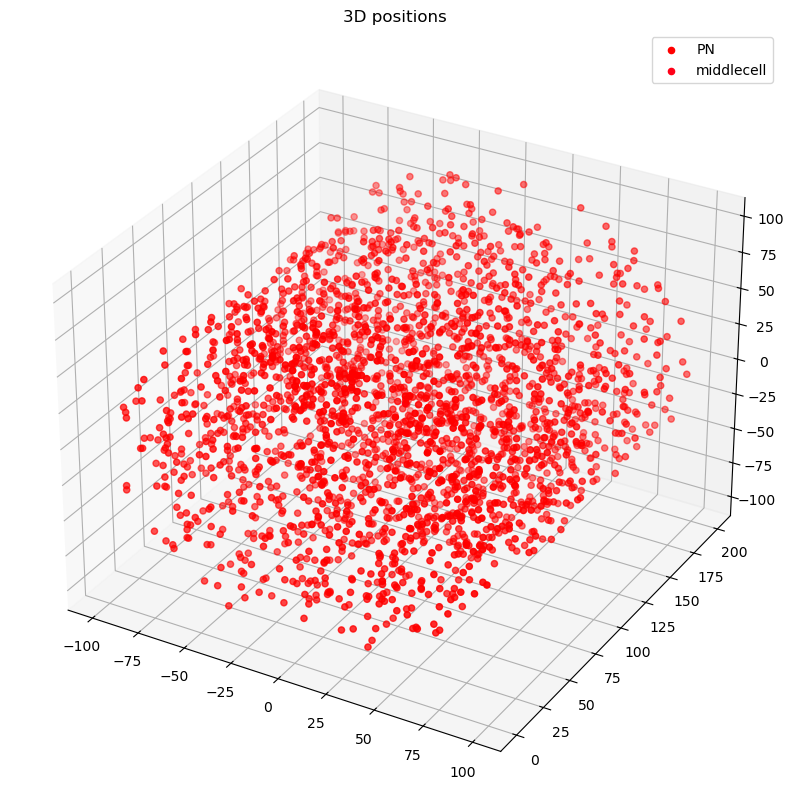

In [ ]:
import bmtool.bmplot as bp

bp.plot_3d_positions(config='config.json',populations_list='all',group_by='pop_name')